<a href="https://colab.research.google.com/github/gaurangsahu99/Cardiovascular-risk-prediction-project/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJECT NAME- CARDIAOVASCULAR RISK PREDICTION

PROJECT TYPE- CLASSIFICATION

CONTRIBUTUION- INDIVIDUAL (CAPSTONE PROJECT BY GAURANG SAHU)

PROJECT SUMMARY---. Day by day the cases of heart diseases are increasing at a rapid rate and it’s very Important
and concerning to predict any such diseases beforehand. This diagnosis is a difficult task i.e. it should
be performed precisely and efficiently. The research  mainly focuses on which patient is more
likely to have a heart disease based on various medical attributes. We prepared a heart disease
prediction system to predict whether the patient is likely to be diagnosed with a heart disease or not
using the medical history of the patient.

GITHUB LINK OF PROJECT------

PROBLEM STAEMENT----There are instruments available which can predict heart disease but either they are expensive or are not efficient to calculate chance of heart disease in human. Early detection of cardiac diseases can decrease the mortality rate and overall complications.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import make_scorer, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRFClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.combine import SMOTETomek                                         # for handling class imbalance

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive                                                  #importing drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path="/content/drive/MyDrive/data_cardiovascular_risk.csv"
df=pd.read_csv(path)                                          #reading csv file
df.head()
df.describe()
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


here we can see presence of null values.

so,we are replacing them with median values.

In [ ]:
median=df.median()

In [ ]:
median

id                 1694.50
age                  49.00
education             2.00
cigsPerDay            0.00
BPMeds                0.00
prevalentStroke       0.00
prevalentHyp          0.00
diabetes              0.00
totChol             234.00
sysBP               128.50
diaBP                82.00
BMI                  25.38
heartRate            75.00
glucose              78.00
TenYearCHD            0.00
dtype: float64

In [ ]:
df = df.fillna(median)             #replacing null values with median


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3390 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3390 non-null   float64
 6   BPMeds           3390 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3390 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3390 non-null   float64
 14  heartRate        3390 non-null   float64
 15  glucose          3390 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

**EXPLORATORY DATA ANALYSIS**

<AxesSubplot:xlabel='age', ylabel='TenYearCHD'>

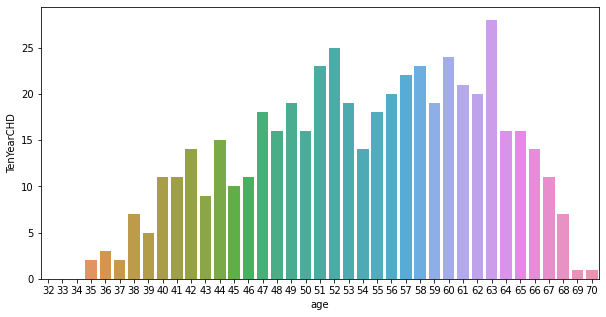

In [ ]:
plt_1= df.groupby(['age'], as_index=False)[['TenYearCHD']].sum()
plt.figure(figsize=(10,5))
sns.barplot(data=plt_1, x='age', y ='TenYearCHD')                       #plotting using seaborn library.


here we can see that 2 peaks which means person who are in their early fifties and mid sixties are more prone to cardiovascular risk.


<AxesSubplot:xlabel='age', ylabel='cigsPerDay'>

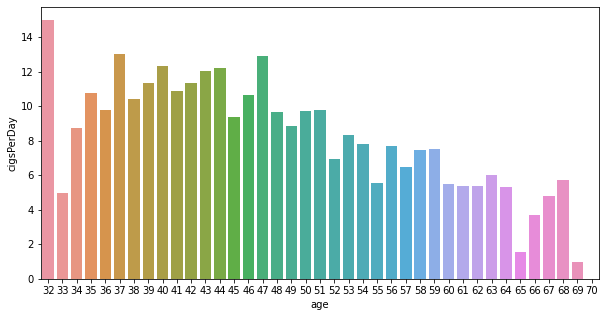

In [ ]:
plt_2= df.groupby(['age'], as_index=False)[['cigsPerDay']].mean()
plt.figure(figsize=(10,5))
sns.barplot(data=plt_2, x='age', y ='cigsPerDay')


here we can see cigrettes more common in youth which is less prone to cardiovascular risks.

**STUDYING DISTRIBUTION**----------



age
cigsPerDay
totChol
sysBP
diaBP
BMI
heartRate
glucose


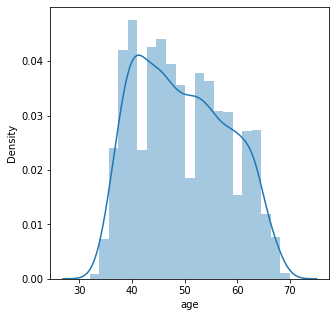

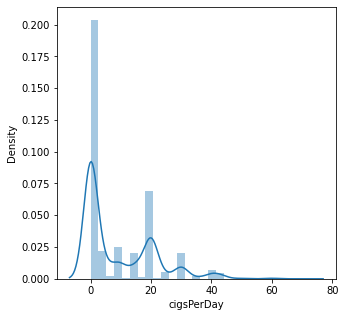

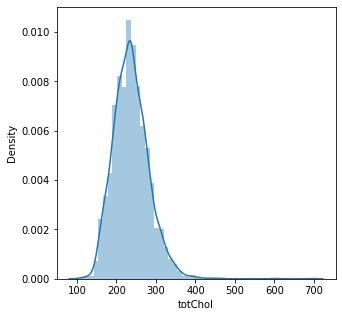

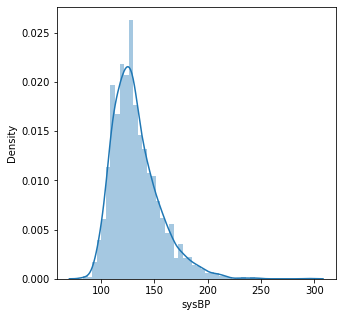

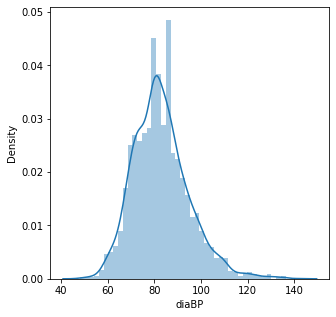

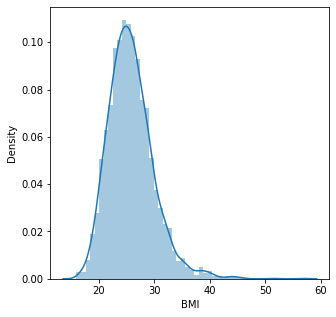

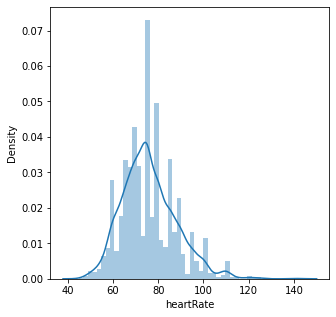

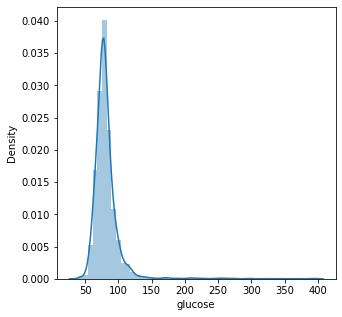

In [ ]:
count_columns=["age","cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose"]
for i in count_columns:
  print(i)
  plt.figure(figsize=(5,5))
  sns.distplot(df[i])

  plt.gca()






age


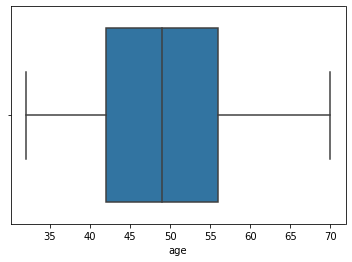

cigsPerDay


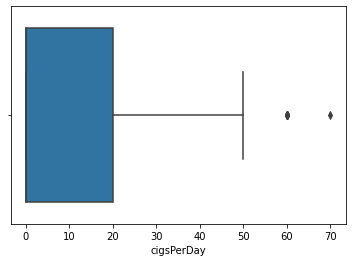

totChol


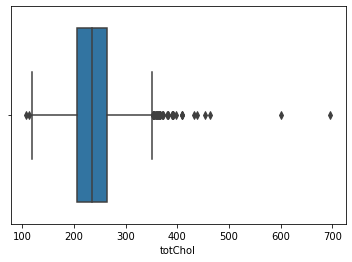

sysBP


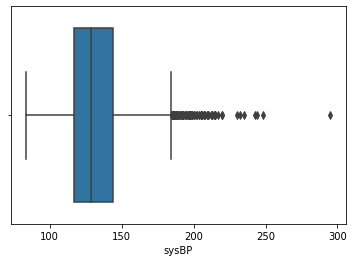

diaBP


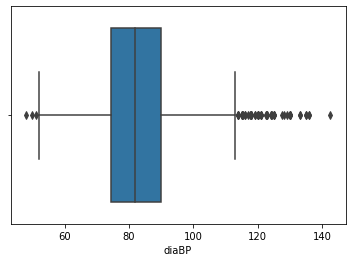

BMI


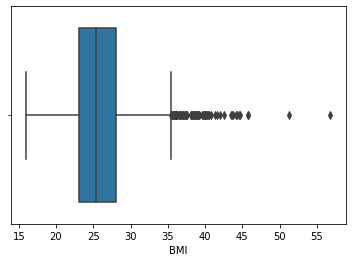

heartRate


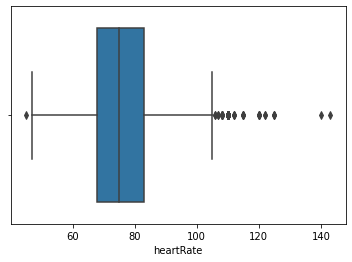

glucose


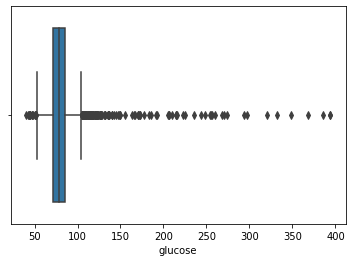

In [ ]:
for i in count_columns:
  print(i)
  sns.boxplot(x=i,data=df)

  plt.gca()
  plt.show()

FROM THE BOXPLOT IT IS CLEAR THAT THERE IS PRESENCE OF SOME OUTLIERS.

SO WE NEED TO REMOVE THEM.

In [ ]:
IQR = df.quantile(0.75) - df.quantile(0.25)              #specifying IQR


In [ ]:
# Define a function to replace outliers with the median
def replace_outliers(df, median, IQR):
    for col in count_columns:
        col_median = median[col]
        col_IQR = IQR[col]
        df[col] = np.where(np.abs(df[col] - col_median) > 1.5 * col_IQR, col_median, df[col])
    return df



In [ ]:
df = replace_outliers(df, median, IQR)


age
cigsPerDay
totChol
sysBP
diaBP
BMI
heartRate
glucose


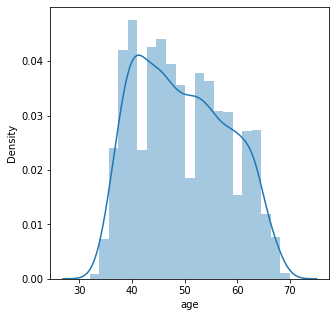

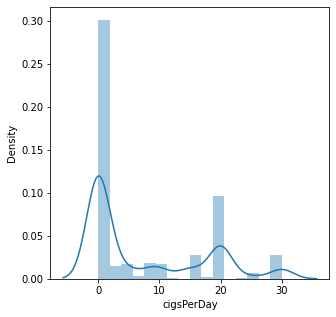

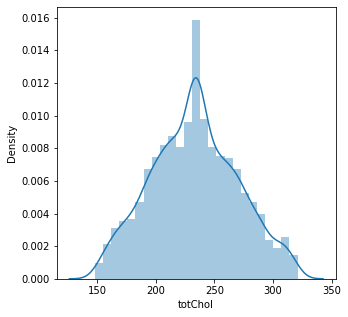

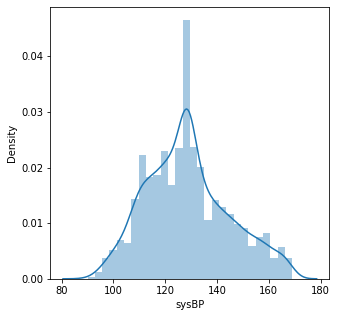

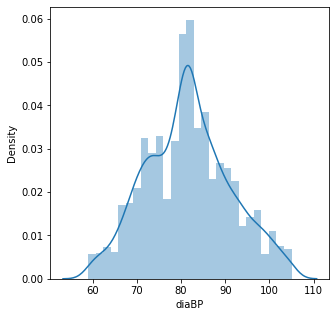

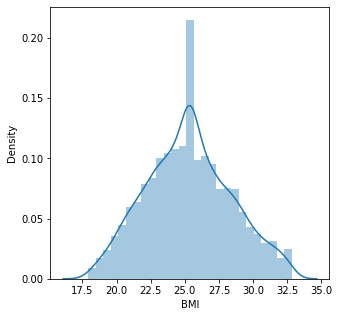

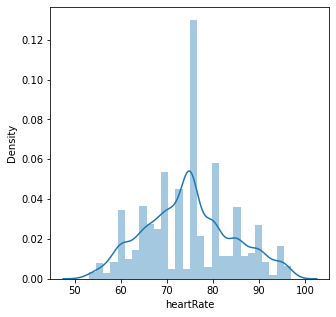

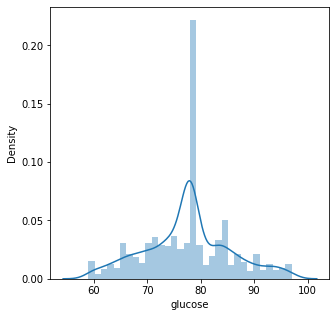

In [ ]:
for i in count_columns:
  print(i)
  plt.figure(figsize=(5,5))
  sns.distplot(df[i])

  plt.gca()


FROM DISTPLOT VALUES BECAME NORMALLY DISTRIBUTED

age


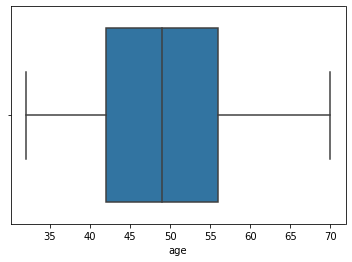

cigsPerDay


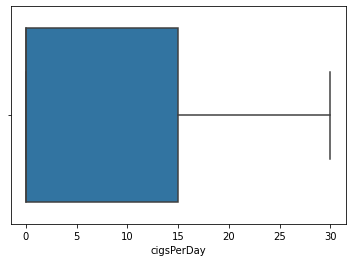

totChol


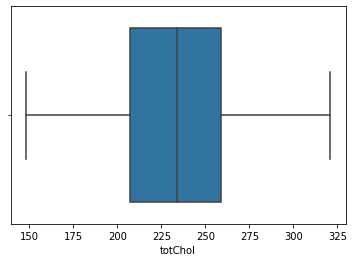

sysBP


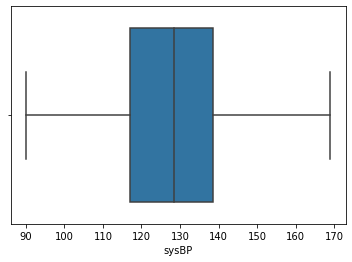

diaBP


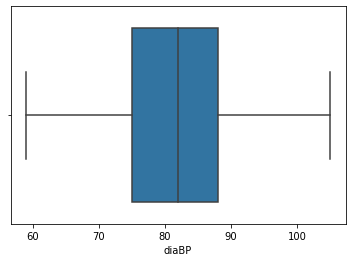

BMI


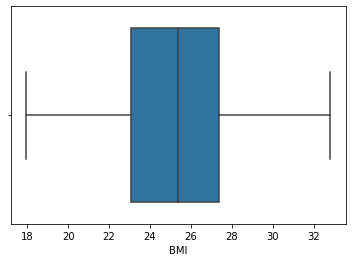

heartRate


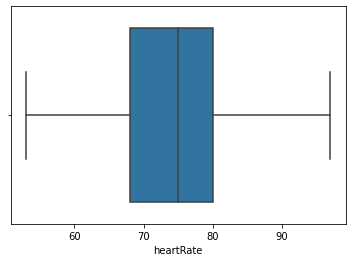

glucose


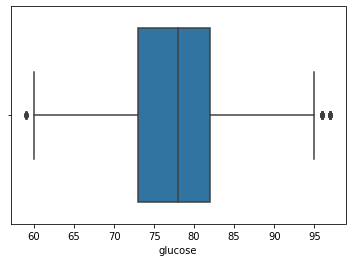

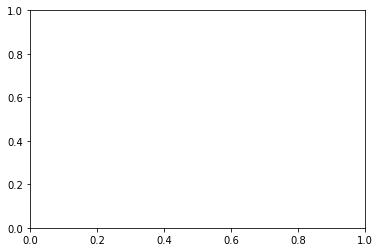

In [ ]:
for i in count_columns:
  print(i)
  sns.boxplot(x=i,data=df)
  plt.show()
  plt.gca()


FROM HERE WE CAN SAY THAT OUTLIER ARE REMOVED

In [ ]:
df["sex"]=df["sex"].replace({"M":1,"F":0})                         #assigning m for 1 and f for 0
df["is_smoking"]=df["is_smoking"].replace({"YES":1,"NO":0})

In [ ]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64.0,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,1,36.0,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46.0,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50.0,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64.0,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
numeric_features = df.describe().columns
numeric_features


Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

**UNIVARIATE ANALYSIS**

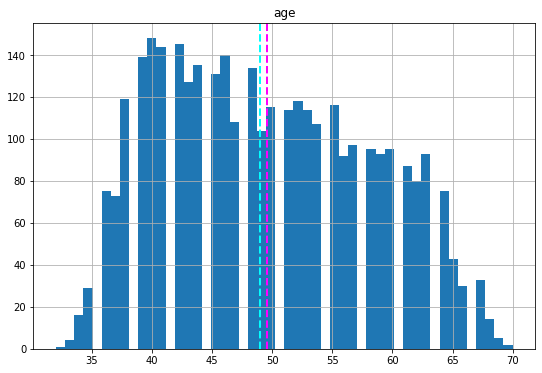

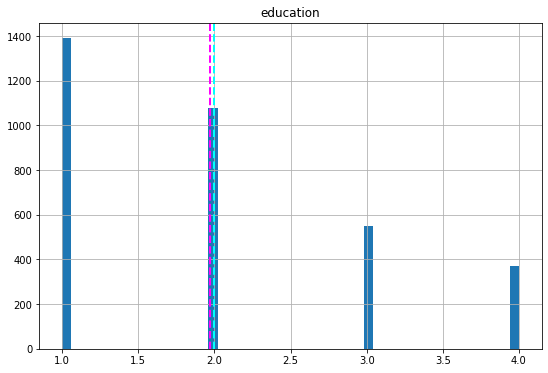

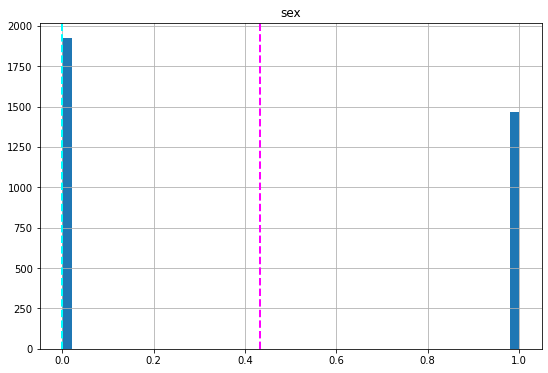

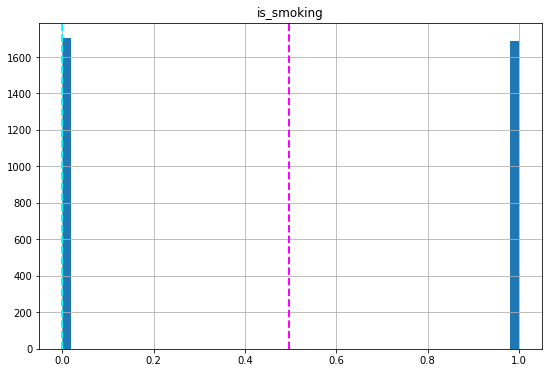

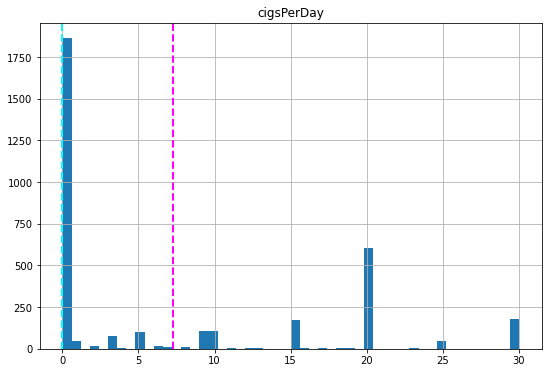

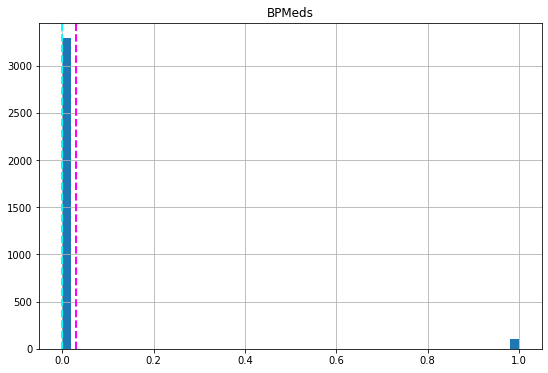

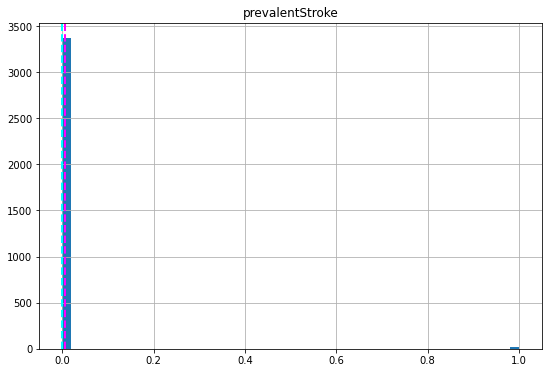

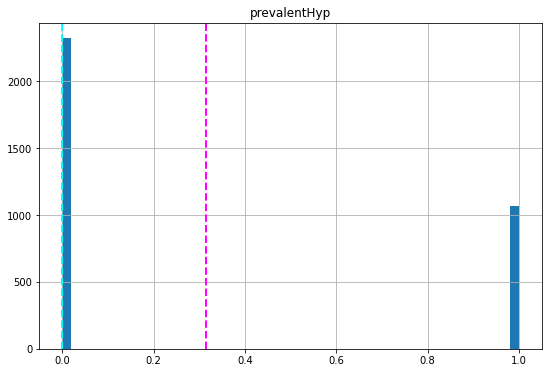

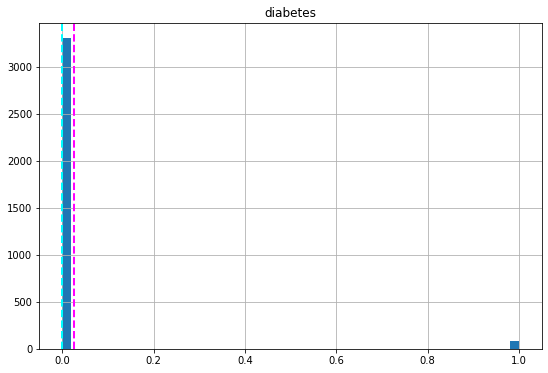

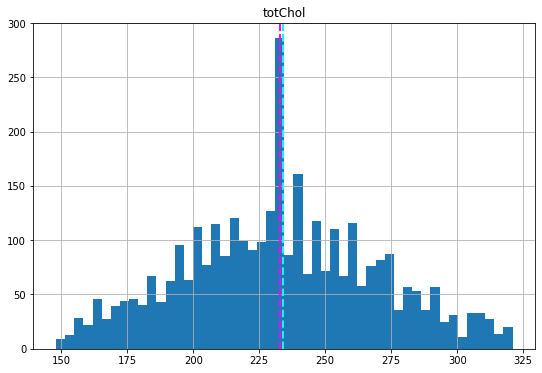

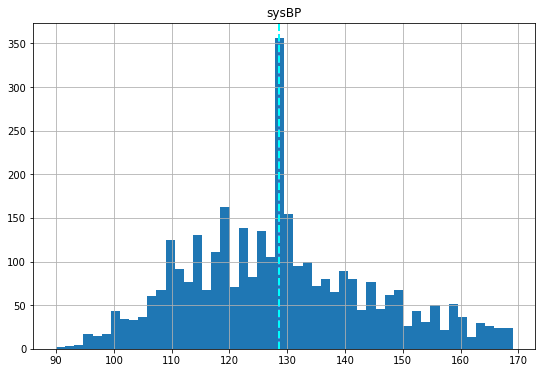

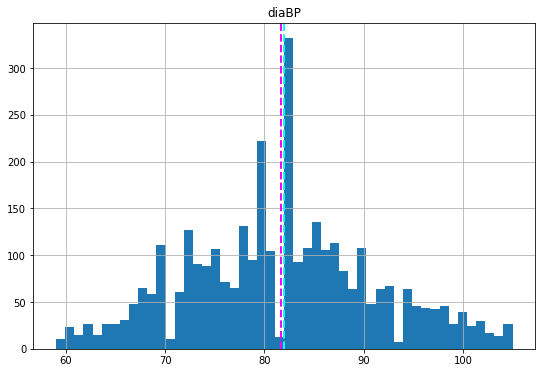

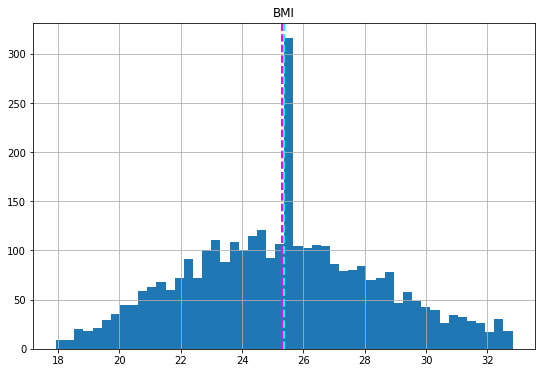

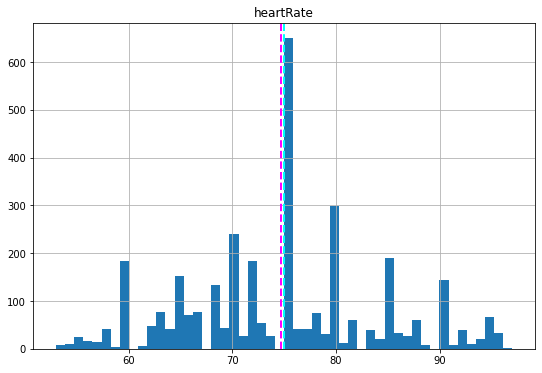

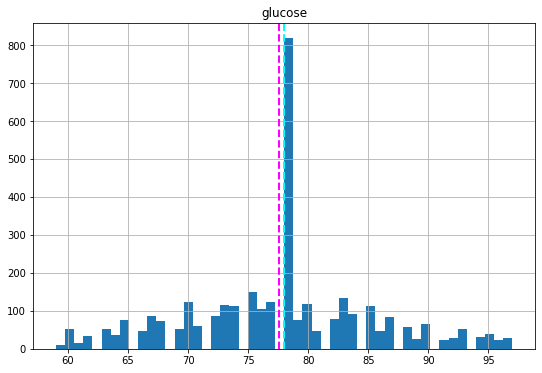

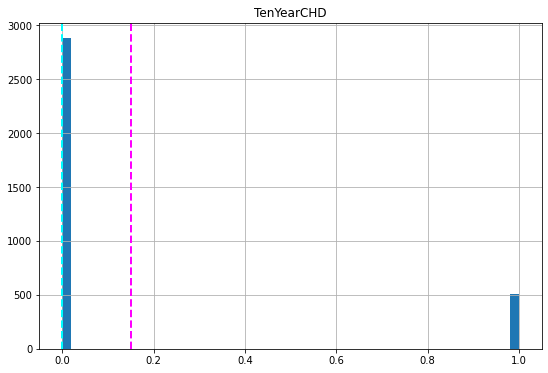

In [ ]:
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

FROM THE LAST UNIVARIATE GRAPH WE CAN CLEARLY SEE THAT THERE IS HUGE CLASS IMBALANCE, WHICH WE WILL HAVE TO FIX

**BIVARAIATE ANALYSIS**

age


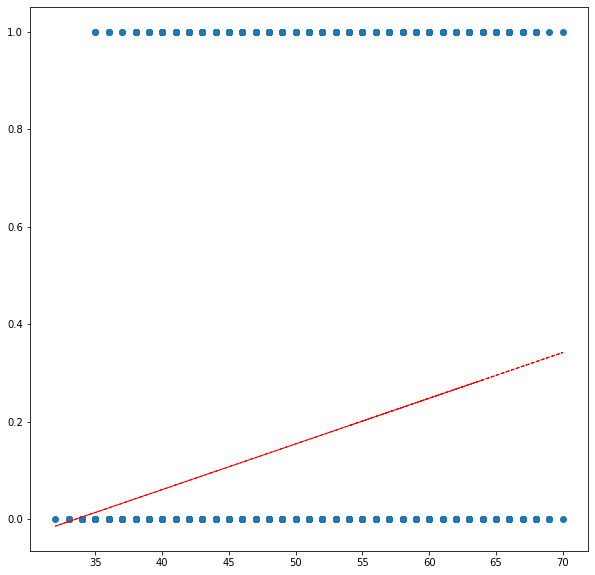

education


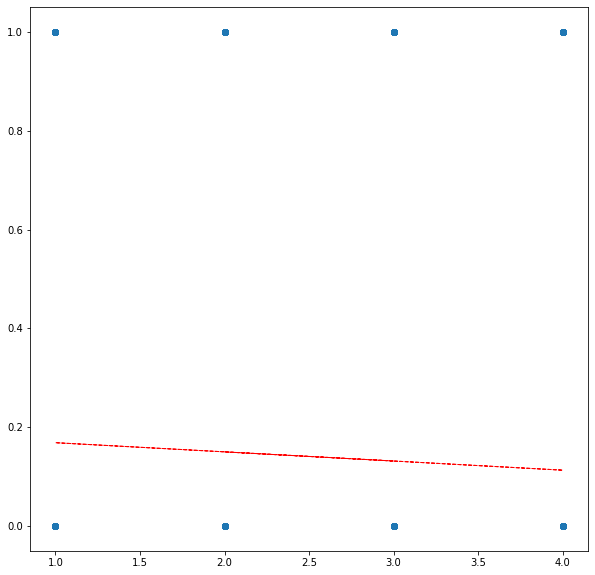

sex


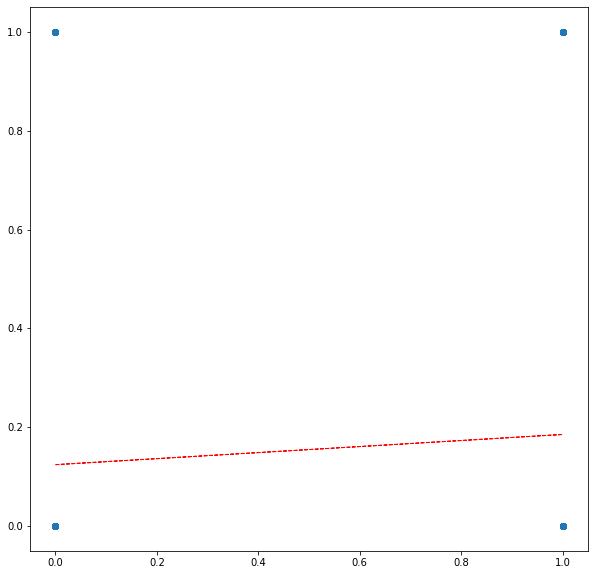

is_smoking


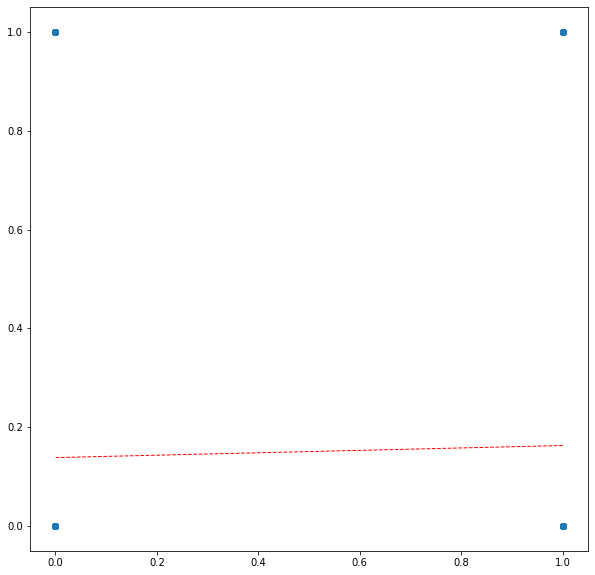

cigsPerDay


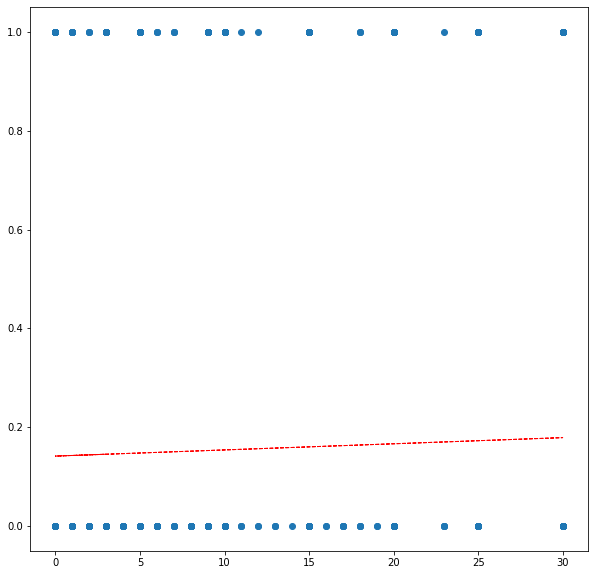

BPMeds


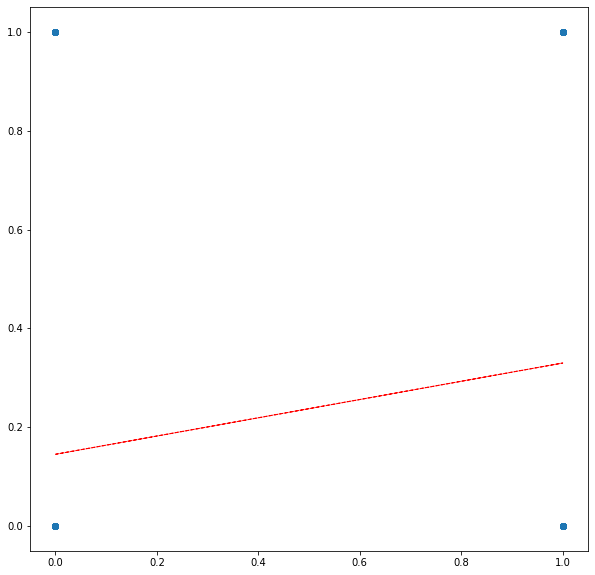

prevalentStroke


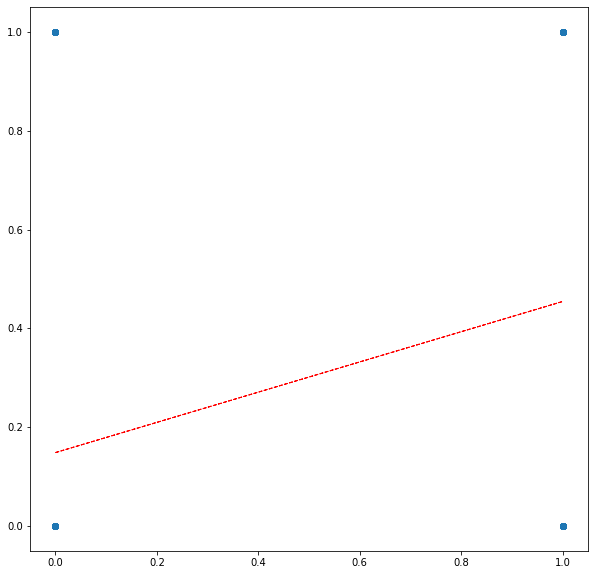

prevalentHyp


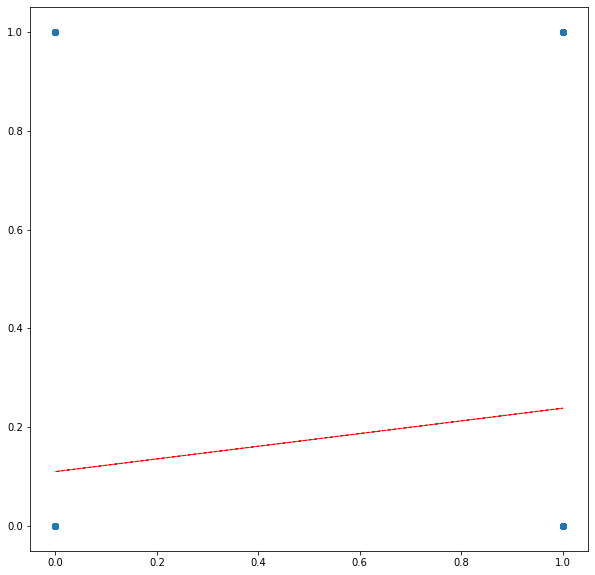

diabetes


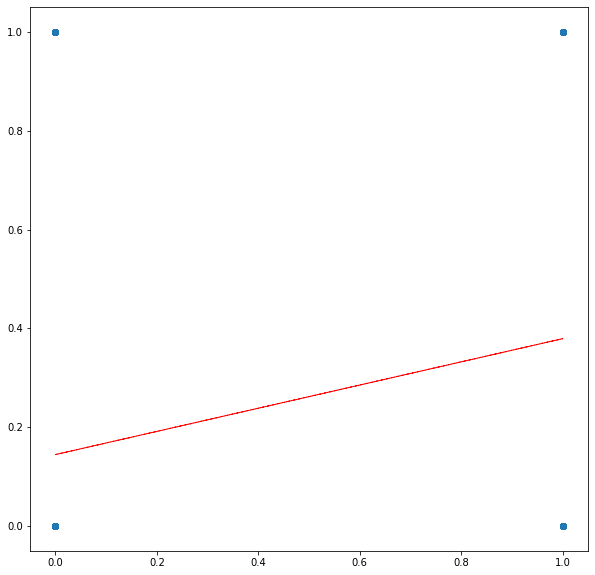

totChol


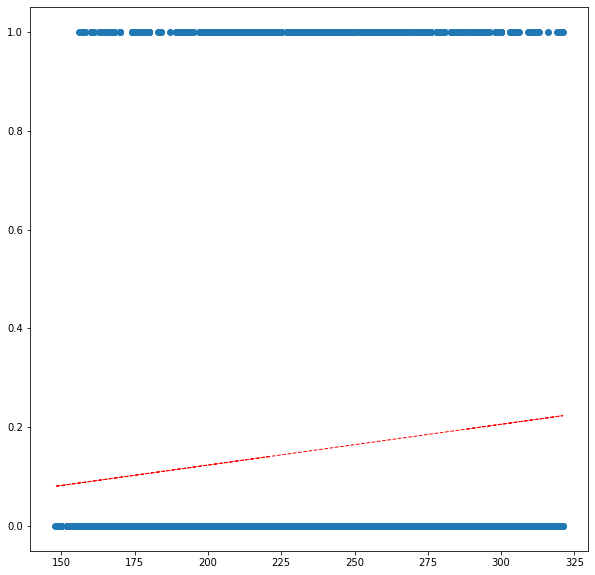

sysBP


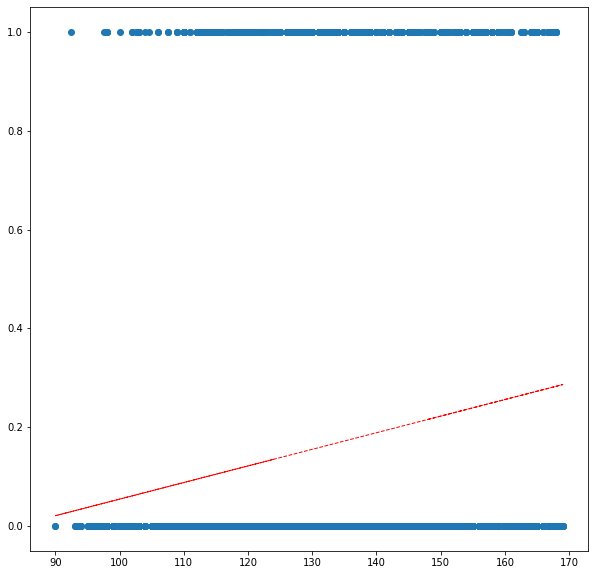

diaBP


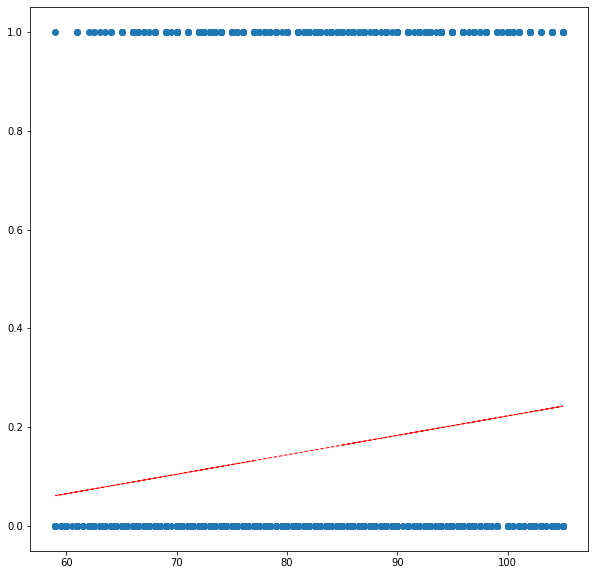

BMI


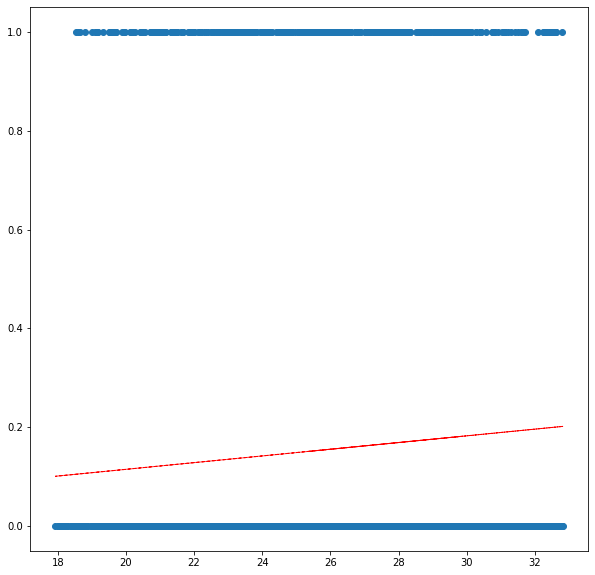

heartRate


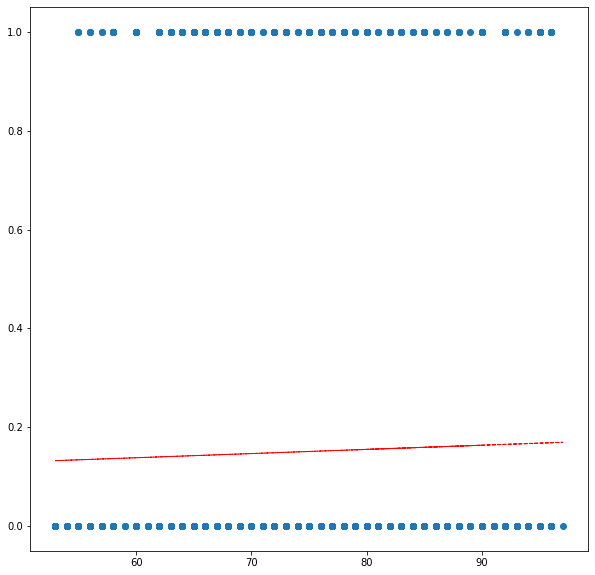

glucose


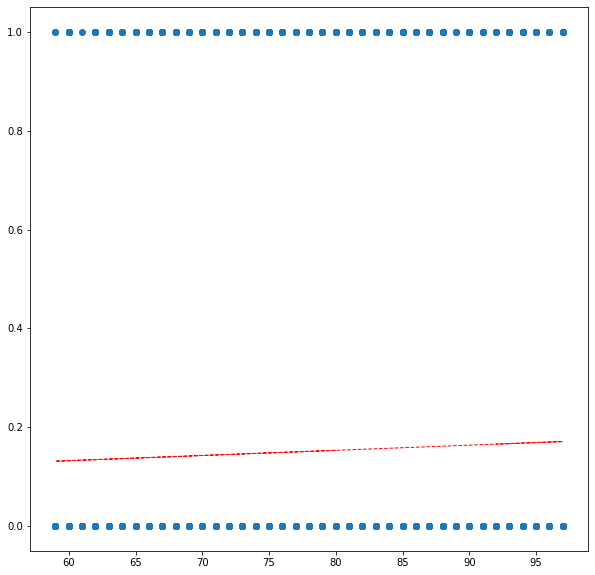

TenYearCHD


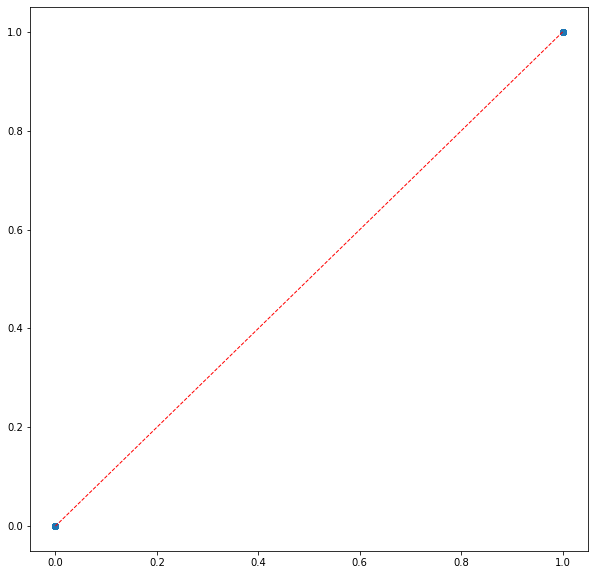

In [ ]:
for i in numeric_features[1:]:
  print(i)
  plt.figure(figsize=(10,10))
  plt.scatter(df[i],df["TenYearCHD"])
  z = np.polyfit(df[i],df['TenYearCHD'],1)
  y_hat = np.poly1d(z)(df[i])
  plt.plot(df[i], y_hat, "r--", lw=1)


  plt.gca()
  plt.show()

**MULTIVARIATE ANALYSIS**

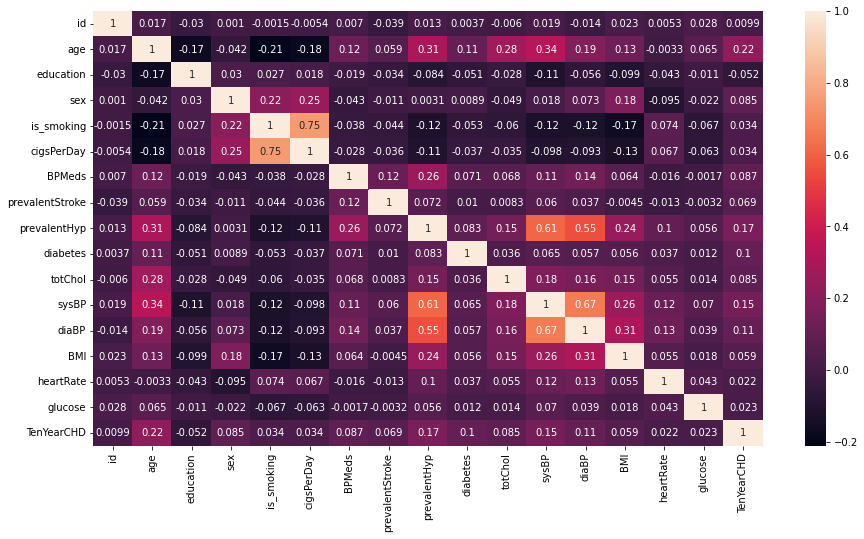

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)


In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['id','TenYearCHD','is_smoking']]])

,variables,VIF
0,age,42.348001
1,education,4.847026
2,sex,2.040426
3,cigsPerDay,1.769765
4,BPMeds,1.133354
5,prevalentStroke,1.026477
6,prevalentHyp,2.230224
7,diabetes,1.045625
8,totChol,44.584886
9,sysBP,142.443515


In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['id','TenYearCHD','is_smoking','sysBP','diaBP','glucose']]])   #not including columns with high vif

,variables,VIF
0,age,36.348467
1,education,4.684985
2,sex,2.029597
3,cigsPerDay,1.763845
4,BPMeds,1.125481
5,prevalentStroke,1.025286
6,prevalentHyp,1.700797
7,diabetes,1.044196
8,totChol,42.453907
9,BMI,55.789695


In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['id','TenYearCHD','is_smoking','sysBP','diaBP','glucose','heartRate',"BMI","totChol"]]])
#final selected columns

,variables,VIF
0,age,5.547306
1,education,4.104833
2,sex,1.871088
3,cigsPerDay,1.633718
4,BPMeds,1.120549
5,prevalentStroke,1.024603
6,prevalentHyp,1.692752
7,diabetes,1.043706


In [ ]:
need_features=['age','education','sex','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes']


In [ ]:
df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [ ]:
from scipy.stats import zscore
X = df[need_features].apply(zscore)
y = df['TenYearCHD']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [ ]:
X_train[0:10]


,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes
2134,0.518857,-0.966100,-0.873425,-0.748945,-0.174342,-0.080821,-0.678658,-0.162295
1161,-1.459817,0.028156,1.144919,0.176656,-0.174342,-0.080821,-0.678658,-0.162295
137,-1.227032,-0.966100,1.144919,-0.748945,-0.174342,-0.080821,1.473495,-0.162295
2170,0.635250,-0.966100,-0.873425,-0.748945,-0.174342,-0.080821,-0.678658,-0.162295
2876,1.100820,0.028156,1.144919,-0.748945,-0.174342,-0.080821,-0.678658,-0.162295
446,0.053287,-0.966100,-0.873425,1.307946,-0.174342,-0.080821,1.473495,-0.162295
895,-0.877854,1.022412,-0.873425,-0.748945,-0.174342,-0.080821,-0.678658,-0.162295
728,-1.110640,0.028156,-0.873425,-0.748945,-0.174342,-0.080821,-0.678658,-0.162295
1604,-0.295891,-0.966100,-0.873425,-0.748945,-0.174342,-0.080821,-0.678658,-0.162295
530,-0.179499,0.028156,1.144919,-0.748945,-0.174342,-0.080821,-0.678658,-0.162295


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()                                 #scaling the values
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
features = [i for i in df.columns if i not in ['TenYearCHD']]
scoring = make_scorer(f1_score, pos_label=1)



In [ ]:
X_train[0:10]



array([[0.57894737, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.13157895, 0.33333333, 1.        , 0.3       , 0.        ,
        0.        , 0.        , 0.        ],
       [0.18421053, 0.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.        ],
       [0.60526316, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.71052632, 0.33333333, 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.47368421, 0.        , 0.        , 0.66666667, 0.        ,
        0.        , 1.        , 0.        ],
       [0.26315789, 0.66666667, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.21052632, 0.33333333, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.39473684, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.      

In [ ]:
from imblearn.combine import SMOTETomek     #import smotetomek for fixing class imbalance it uses smote and tomek links to make clear boundary.
from collections import Counter              #importing counter to count original and resampled data
smote = SMOTETomek(random_state=27)
x_smote_train, y_smote_train = smote.fit_resample( X_train ,y_train)
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_smote_train)))



Original dataset shape Counter({0: 2305, 1: 407})
Resampled dataset shape Counter({0: 2226, 1: 2226})


In [ ]:
def analyse_model(model, X_train, X_test, y_train, y_test):         #defining a function for fitting the model

  # Fitting the model
  model.fit(X_train,y_train)

  # Feature importances
  try:
    try:
      importance = model.feature_importances_
      feature = features
    except:
      importance = np.abs(model.coef_[0])                           #for finding the features which is most influential on dependent variable,
      feature = need_features
    indices = np.argsort(importance)                                #sorting them according to their importance
    indices = indices[::-1]
  except:
    pass

  # Plotting Evaluation Metrics for train and test dataset
  for x, act, label in ((X_train, y_train, 'Train-Set'),(X_test, y_test, "Test-Set")):

    # Getting required metrics
    pred = model.predict(x)
    pred_proba = model.predict_proba(x)[:,1]
    report = pd.DataFrame(classification_report(y_pred=pred, y_true=act, output_dict=True))
    #fpr, tpr, thresholds = roc_curve(act, pred_proba)

    # Classification report
    plt.figure(figsize=(18,3))
    plt.subplot(1,3,1)
    sns.heatmap(report.iloc[:-1, :-1].T, annot=True, cmap='coolwarm')            #ploting train test matrix
    plt.title(f'{label} Report')

 # Confusion Matrix
    plt.subplot(1,3,2)
    sns.heatmap(confusion_matrix(y_true=act, y_pred=pred), annot=True, cmap='coolwarm')   #plotting confusion matrix
    plt.title(f'{label} Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual labels')

# Plotting Feature Importance
  try:
    plt.figure(figsize=(18,3))
    plt.bar(range(len(indices)),importance[indices])                            #plotting bar grapgh for most important features
    plt.xticks(range(len(indices)), [feature[i] for i in indices])
    plt.title('Feature Importance')
    plt.tight_layout()
  except:
    pass
  plt.show()

  return model

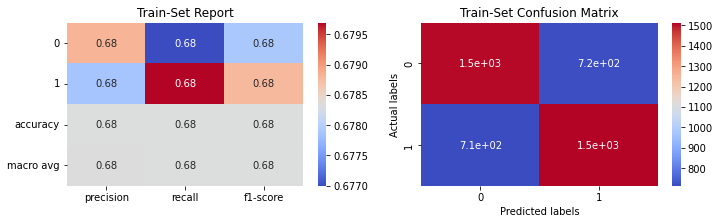

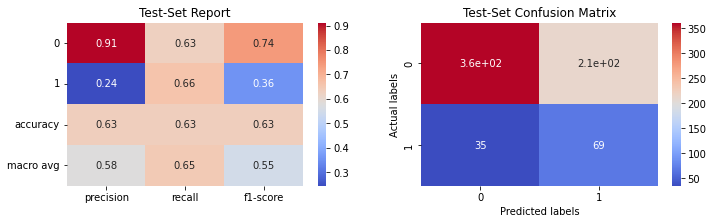

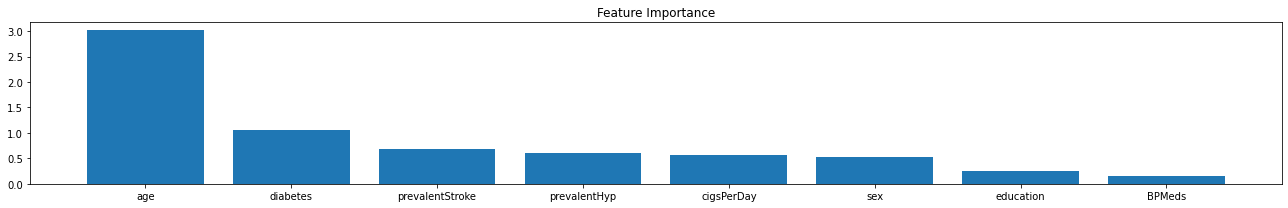

LogisticRegression(max_iter=10000)

In [ ]:
# Fitting Logistic Regression Model
lr = LogisticRegression(fit_intercept=True, max_iter=10000)
analyse_model(lr, x_smote_train, X_test, y_smote_train, y_test)

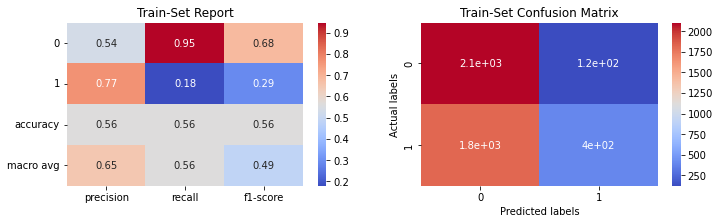

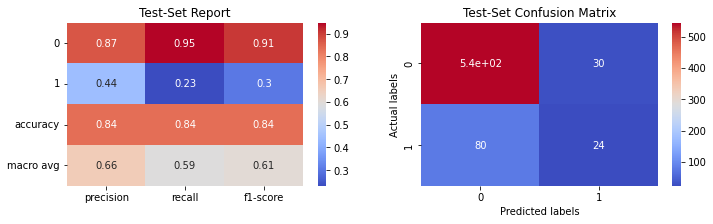

<Figure size 1296x216 with 0 Axes>

GaussianNB()

In [ ]:
nbc = GaussianNB()
analyse_model(nbc, x_smote_train, X_test, y_smote_train, y_test)


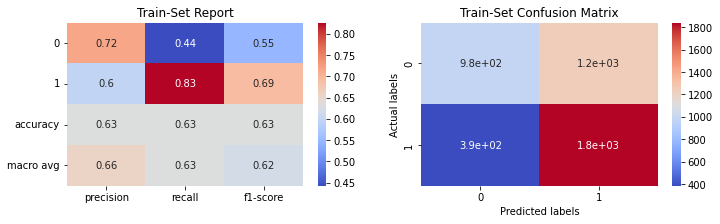

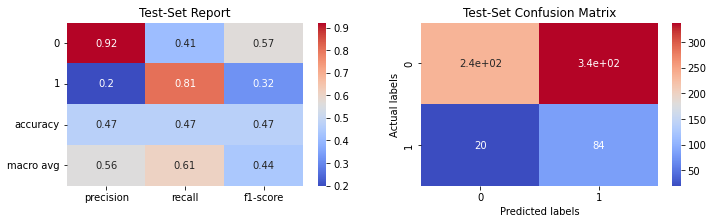

<Figure size 1296x216 with 0 Axes>

SVC(C=0.1, max_iter=1000, probability=True, random_state=0)

In [ ]:
# SVM algorithm
clf = SVC(random_state= 0,probability=True)

# HYperparameter Grid
grid = {'kernel': ["linear","rbf","poly","sigmoid"],
        'C': [0.1, 1, 10, 100],
        'max_iter' : [1000]}

# GridSearch to find the best parameters
svc = GridSearchCV(clf, param_grid = grid,scoring=scoring, cv=5)
svc.fit(x_smote_train, y_smote_train)

# Analysing the model with best set of parametes
analyse_model(svc.best_estimator_, x_smote_train, X_test, y_smote_train, y_test)

In [ ]:
# Splitting the data into train and test by redefining X
X = scaler.fit_transform(df[features])
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)

# Handling class imbalance by oversampling followed by removing the Tomek link
X_smote, y_smote = SMOTETomek(random_state=45).fit_resample(X_train, y_train)

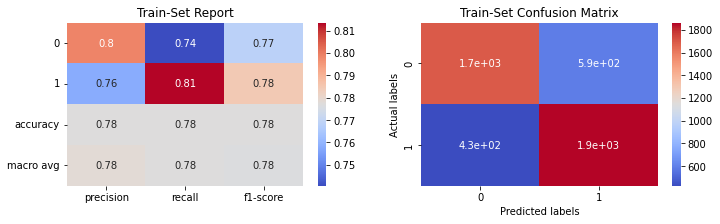

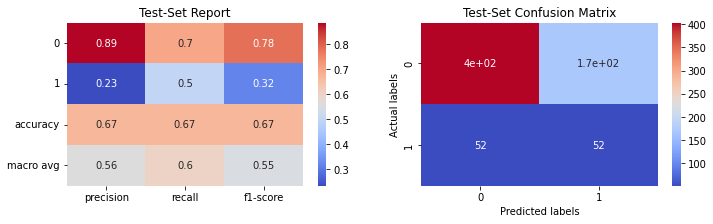

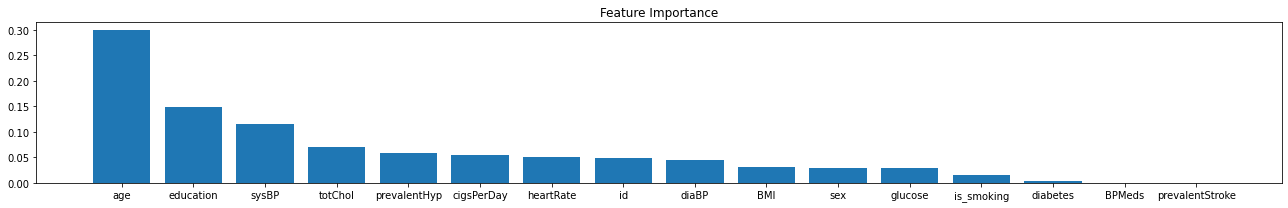

RandomForestClassifier(max_depth=8, min_samples_leaf=46, min_samples_split=50,
                       n_estimators=150, random_state=2)

In [ ]:
# Classifier
clf = RandomForestClassifier(random_state=2)

# HYperparameter Grid
grid = {'n_estimators' : [100,150],
        'max_depth' : [4,6,8],
        'min_samples_split' : [50,80],
        'min_samples_leaf' : [46,60]}

# GridSearch to find the best parameters
rf = GridSearchCV(clf, param_grid = grid, scoring = scoring, cv=5)
rf.fit(X_smote, y_smote)

# Analysing the model with best set of parametes
analyse_model(rf.best_estimator_, X_smote, X_test, y_smote, y_test)

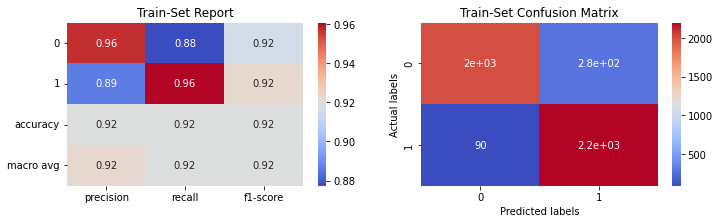

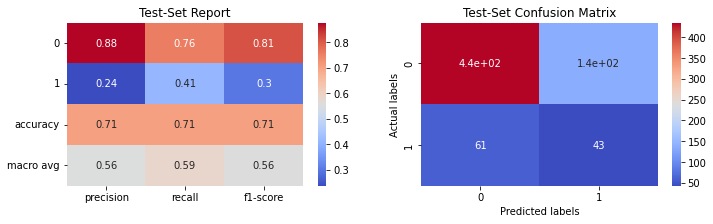

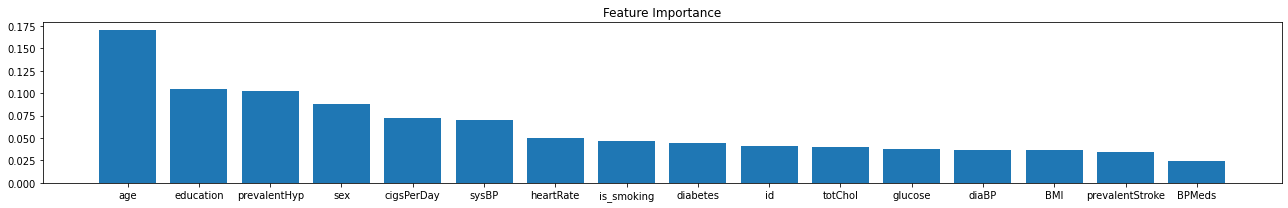

XGBRFClassifier(eta=0.05, max_depth=10, min_samples_leaf=30,
                min_samples_split=50, n_estimators=150, random_state=3,
                silent=True)

In [ ]:
# Classifier
clf = XGBRFClassifier(silent=True, random_state=3)

# HYperparameter Grid
grid = {'n_estimators' : [150],
        'max_depth' : [8,10],
        'min_samples_split' : [50,100],
        'min_samples_leaf' : [30,50],
        'eta' : [0.05,0.08,0.1]}

# GridSearch to find the best parameters
xgb = GridSearchCV(clf, param_grid = grid, scoring = scoring, cv=5)
xgb.fit(X_smote, y_smote)

# Analysing the model with best set of parametes
analyse_model(xgb.best_estimator_, X_smote, X_test, y_smote, y_test)

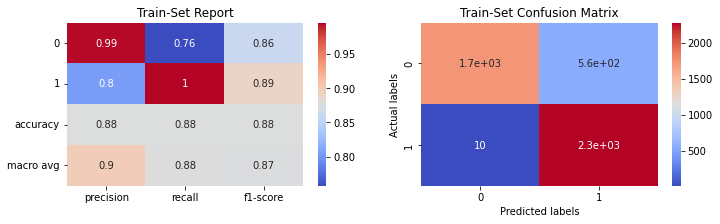

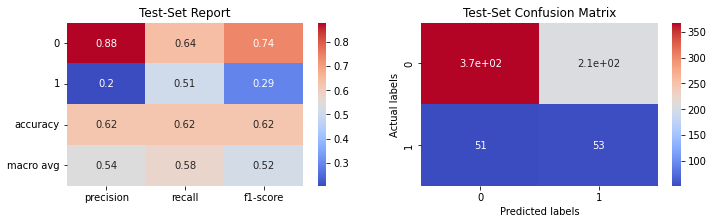

<Figure size 1296x216 with 0 Axes>

KNeighborsClassifier(metric='manhattan')

In [ ]:
# Classifier
clf = KNeighborsClassifier()

# HYperparameter Grid
grid = {'n_neighbors' : [5,7,9],
        'metric' : ['minkowski','euclidean','manhattan']}

# GridSearch to find the best parameters
knn = GridSearchCV(clf, param_grid = grid, scoring = scoring, cv=5)
knn.fit(X_smote, y_smote)

# Analysing the model with best set of parametes
analyse_model(knn.best_estimator_, X_smote, X_test, y_smote, y_test)

conclusion-------''If we want to completely avoid any situations where the patient has heart disease, a high recall is desired.

 Whereas if we want to avoid treating a patient with no heart diseases a high precision is desired.


Assuming that in our case the patients who were incorrectly classified as suffering from heart disease are equally important since they could be indicative of some other ailment, so we want a balance between precision and recall and a high f1 score is desired
Best performance of Models on test data based on evaluation metrics for class 1:


recall - SVC


Precision - Naive Bayes Classifier


F1 Score - Logistic Regression, XGBoost


Accuracy - Naive Bayes Classifier